In [32]:
import numpy as np

In [33]:
import pandas as pd

In [34]:
import matplotlib.pyplot as plt

In [35]:
import statsmodels.api as sm

In [36]:
from statsmodels.stats.proportion import proportion_confint

This is Question 1

In [6]:
df=pd.read_csv(r"D:\Seif Data\AUC\Fundamentals of Data Science\Python\results.csv")

In [7]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False


In [8]:
x=df['home_score']-df['away_score']

In [9]:
conditions = [(x<0),(x>0),(x==0)]

In [10]:
values= ['win','lose','draw']

In [11]:
df['result'] = np.select(conditions, values)

In [12]:
df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,lose


In [13]:
df['result'].value_counts()

lose    21009
win     12224
draw     9955
Name: result, dtype: int64

In [14]:
df['result'].value_counts(normalize=True)

lose    0.486455
win     0.283042
draw    0.230504
Name: result, dtype: float64

These are the total wins, loses, and draws. They are also given in percentages.

In [15]:
x=df['result'].value_counts()

In [16]:
x

lose    21009
win     12224
draw     9955
Name: result, dtype: int64

In [17]:
x=np.array(x)

In [18]:
x

array([21009, 12224,  9955], dtype=int64)

In [19]:
N=x.sum()

In [20]:
N

43188

In [21]:
CI_win=proportion_confint(count=x[1],nobs=N,alpha=(1-.95))

In [22]:
CI_lose=proportion_confint(count=x[0],nobs=N,alpha=(1-.95))

In [23]:
CI_draw=proportion_confint(count=x[2],nobs=N,alpha=(1-.95))

In [24]:
CI_win

(0.27879305599044235, 0.28729011526083115)

In [25]:
CI_lose

(0.481740705905987, 0.49116843552218753)

In [26]:
CI_draw

(0.2265318471530234, 0.23447584016752862)

These are the confidence intervals for winning, losing, and drawing of all countries.

In [48]:
x=df['country'].unique()

In [49]:
x

array(['Scotland', 'England', 'Wales', 'Ireland', 'United States',
       'Uruguay', 'Austria', 'Hungary', 'Argentina', 'Belgium', 'France',
       'Netherlands', 'Bohemia', 'Switzerland', 'Sweden', 'Germany',
       'Italy', 'Chile', 'Norway', 'Finland', 'Luxembourg', 'Russia',
       'Denmark', 'Spain', 'Japan', 'Brazil', 'Paraguay', 'China PR',
       'Canada', 'Estonia', 'Guatemala', 'Czechoslovakia', 'Poland',
       'Yugoslavia', 'New Zealand', 'Romania', 'Latvia', 'Portugal',
       'Northern Ireland', 'Australia', 'Lithuania', 'Turkey', 'Mexico',
       'Aruba', 'Soviet Union', 'Haiti', 'Philippines', 'Bulgaria',
       'Jamaica', 'Kenya', 'Czech Republic', 'Peru', 'Honduras',
       'British Guyana', 'Uganda', 'El Salvador', 'Barbados',
       'Irish Free State', 'Trinidad and Tobago', 'Greece', 'Curaçao',
       'Egypt', 'Dominica', 'Guadeloupe', 'Palestine',
       'Netherlands Guyana', 'French Guiana', 'Cuba', 'Colombia',
       'Saint Kitts and Nevis', 'Éire', 'Panama', 'B

These are the countries in the dataset. The country that will be analyzed is Spain.

In [58]:
dfsp=df[df['country']=='Spain']

In [59]:
dfsp.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
347,12/1/1912,Catalonia,France,1,0,Friendly,Barcelona,Spain,False,lose
415,1/3/1915,Basque Country,Catalonia,6,1,Friendly,Bilbao,Spain,False,lose
417,2/7/1915,Catalonia,Basque Country,2,2,Friendly,Barcelona,Spain,False,draw
419,5/13/1915,Basque Country,Catalonia,1,0,Friendly,Madrid,Spain,False,lose
432,5/21/1916,Catalonia,Basque Country,1,3,Friendly,Barcelona,Spain,False,win


In [61]:
conditions = [(dfsp['tournament']=='Friendly'),(dfsp['tournament']!='Friendly')]

In [63]:
df['tournament'].value_counts()

Friendly                                17276
FIFA World Cup qualification             7885
UEFA Euro qualification                  2594
African Cup of Nations qualification     1719
FIFA World Cup                            900
                                        ...  
AFF Championship qualification              2
Atlantic Heritage Cup                       2
Cup of Ancient Civilizations                2
FIFA 75th Anniversary Cup                   1
TIFOCO Tournament                           1
Name: tournament, Length: 126, dtype: int64

In [66]:
values=['FIFA World Cup qualification', 'UEFA Euro qualification']

In [67]:
dfsp['typematch'] = np.select(conditions, values)

C:\Users\teeto\AppData\Local\Temp\ipykernel_31572\3410179208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsp['typematch'] = np.select(conditions, values)


In [68]:
dfsp['typematch'].value_counts()

FIFA World Cup qualification    337
UEFA Euro qualification         204
Name: typematch, dtype: int64

The previous step allows us to compare the probability of winning, losing, or drawing in the two tournaments: FIFA World Cup Qualification and UEFA Euro Qualification.

The following steps are now used to analyze probability.

In [70]:
x=pd.crosstab(dfsp['typematch'],dfsp['result'],margins=True)

In [71]:
x

result,draw,lose,win,All
typematch,,,,
FIFA World Cup qualification,74,190,73,337
UEFA Euro qualification,37,137,30,204
All,111,327,103,541


This is a contingency table to compare the wins, losses, and draws of the 2 tournaments.

In [88]:
x=np.array(x)

In [89]:
x

array([[ 74, 190,  73, 337],
       [ 37, 137,  30, 204],
       [111, 327, 103, 541]], dtype=int64)

In [94]:
cispwinfifaworldcupqualification=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(0.05))

In [95]:
cispwinfifaworldcupqualification

(0.17263605538690138, 0.2605983659780838)

In [96]:
cispwinuefaeuroqualification=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(0.05))

In [97]:
cispwinuefaeuroqualification

(0.09845861962347333, 0.1956590274353502)

These are the confidence intervals of the wins of both tournaments

In [98]:
cisplosefifaworldcupqualification=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(0.05))

In [99]:
cisploseuefaeuroqualification=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(0.05))

In [100]:
cisplosefifaworldcupqualification

(0.5108515426903429, 0.6167448964787966)

In [101]:
cisploseuefaeuroqualification

(0.6071219510982405, 0.7360153038037202)

These are the confidence intervals for the matches lost in both tournamnets

In [102]:
ci_spwin = {}
ci_spwin['Typematch'] = ['FIFA World Cup qualification','UEFA Euro qualification']
ci_spwin['lb'] = [cispwinfifaworldcupqualification[0],cispwinuefaeuroqualification[0]]
ci_spwin['ub'] = [cispwinfifaworldcupqualification[1],cispwinuefaeuroqualification[1]]
df_ci= pd.DataFrame(ci_spwin)
df_ci

,Typematch,lb,ub
0,FIFA World Cup qualification,0.172636,0.260598
1,UEFA Euro qualification,0.098459,0.195659


([<matplotlib.axis.YTick at 0x2b3399c2490>,
 [Text(0, 0, 'FIFA World Cup qualification'),
  Text(0, 1, 'UEFA Euro qualification')])

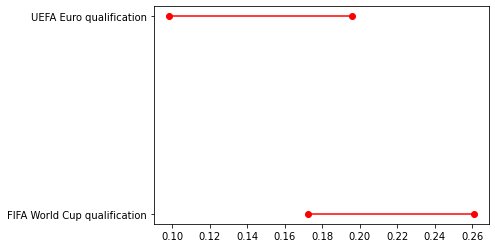

In [103]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

This is the plot of the confidence interval for the wins in both tournaments.

In [104]:
ci_spwin = {}
ci_spwin['Typematch'] = ['FIFA World Cup qualification','UEFA Euro qualification']
ci_spwin['lb'] = [cisplosefifaworldcupqualification[0],cisploseuefaeuroqualification[0]]
ci_spwin['ub'] = [cisplosefifaworldcupqualification[1],cisploseuefaeuroqualification[1]]
df_ci= pd.DataFrame(ci_spwin)
df_ci

,Typematch,lb,ub
0,FIFA World Cup qualification,0.510852,0.616745
1,UEFA Euro qualification,0.607122,0.736015


([<matplotlib.axis.YTick at 0x2b33e972f10>,
 [Text(0, 0, 'FIFA World Cup qualification'),
  Text(0, 1, 'UEFA Euro qualification')])

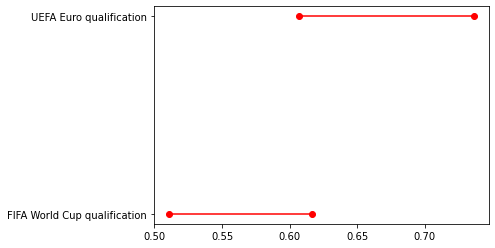

In [105]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

This is the plot of the confidence interval for losses in both tournaments 

It is clear from the results and graphs that the probability of losing in both tournaments is greater than winning in both tournaments.

Now we check some factors that affect the results of the matches, primarily home/away games.

In [107]:
dfsp['home']=(dfsp['home_team']=='Spain')

C:\Users\teeto\AppData\Local\Temp\ipykernel_31572\2307192130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsp['home']=(dfsp['home_team']=='Spain')


In [108]:
dfsp['home'].value_counts()

True     317
False    224
Name: home, dtype: int64

In [109]:
x=pd.crosstab(dfsp['home'],dfsp['result'],margins=True)

In [110]:
x

result,draw,lose,win,All
home,,,,
False,53,105,66,224
True,58,222,37,317
All,111,327,103,541


In [111]:
x=np.array(x)

In [112]:
x

array([[ 53, 105,  66, 224],
       [ 58, 222,  37, 317],
       [111, 327, 103, 541]], dtype=int64)

In [115]:
CIspwinhome=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))

In [129]:
CIspwinaway=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))

In [117]:
CIspwinhome

(0.08137334038124203, 0.15206514542317437)

In [130]:
CIspwinaway

(0.1532946181949712, 0.21914486038975878)

In [131]:
ci_spwin = {}
ci_spwin['home'] = ['Yes','No']
ci_spwin['lb'] = [CIspwinhome[0],CIspwinaway[0]]
ci_spwin['ub'] = [CIspwinhome[1],CIspwinaway[1]]
df_ci= pd.DataFrame(ci_spwin)
df_ci

,home,lb,ub
0,Yes,0.081373,0.152065
1,No,0.153295,0.219145


([<matplotlib.axis.YTick at 0x2b33ea3fd00>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

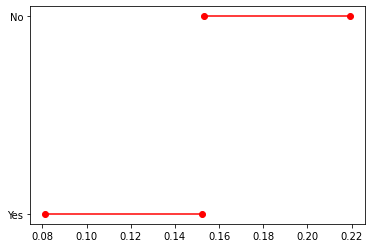

In [132]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

As interpreted from the graphs and results of the confidence intervals and the contingency table. It is more likely that Spain wins the matches of the tournaments that they play if they are playing at home rather than playing away.

Now, Question 2

In [133]:
import pandas as pd

In [134]:
df=pd.read_csv(r"D:\Seif Data\AUC\Fundamentals of Data Science\Python\covid_data.csv",encoding='latin-1')

In [135]:
df.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


We will be analyzing the United States Covid Data

In [136]:
from pandas.api.types import CategoricalDtype
cats=['Fri', 'Sat', 'Sun','Mon','Tue','Wed','Thu']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekdays'] = df['weekdays'].astype(cat_type)

In [137]:
import numpy as np

In [138]:
dfus=df[df['country']=='United States']

In [139]:
stats=dfus.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size]})

In [140]:
stats

dcases                   
                  mean           std size
weekdays                                 
Fri       97766.441176  87289.295484  102
Sat       62373.643564  60491.420445  101
Sun       50719.475248  50025.738086  101
Mon       82209.851485  80799.654956  101
Tue       76927.782178  68045.171075  101
Wed       84203.774510  78861.612337  102
Thu       85821.529412  86109.883852  102

From this finding, we can see that the average daily number of cases is between 50,000 and 100,000 cases

In [141]:
stats2=dfus.groupby("weekdays").agg({"ddeaths": [np.mean, np.std, np.size]})

In [142]:
stats2

ddeaths                  
                 mean          std size
weekdays                               
Fri       1345.549020   931.774318  102
Sat        938.415842   813.893436  101
Sun        570.722772   542.913458  101
Mon        873.762376   648.856458  101
Tue       1371.673267   962.491248  101
Wed       1573.156863  1113.994541  102
Thu       1480.284314  1108.293491  102

From this interpretation, we can see that the average number of daily deaths is between 900 and 1400.

In [143]:
np.mean(stats)

C:\Users\teeto\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


dcases  mean    77146.071082
        std     73088.968034
        size      101.428571
dtype: float64

In [144]:
np.mean(stats2)

ddeaths  mean    1164.794922
         std      874.602421
         size     101.428571
dtype: float64

In [145]:
77146.071082/1164.794922

66.23146240158488

The previous number is the average ratio between the daily number of cases and daily number of deaths.

In [146]:
import scipy.stats 

In [147]:
stats.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [148]:
ci95_hi = []
ci95_lo = []

In [149]:
for i in stats.index:
    m, s, n = stats.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])

In [150]:
ci95_hi

[114996.3540828687,
 74374.9690916644,
 60644.43920277449,
 98240.27289844898,
 90427.75031630995,
 99770.15873456904,
 102818.63989269752]

In [151]:
ci95_lo

[80536.52827007248,
 50372.318037048455,
 40794.51129227501,
 66179.43007184804,
 63427.8140401257,
 68637.3902850388,
 68824.41893083187]

In [152]:
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

                dcases                           ci95_hi       ci95_lo
                  mean           std size                             
weekdays                                                              
Fri       97766.441176  87289.295484  102  114996.354083  80536.528270
Sat       62373.643564  60491.420445  101   74374.969092  50372.318037
Sun       50719.475248  50025.738086  101   60644.439203  40794.511292
Mon       82209.851485  80799.654956  101   98240.272898  66179.430072
Tue       76927.782178  68045.171075  101   90427.750316  63427.814040
Wed       84203.774510  78861.612337  102   99770.158735  68637.390285
Thu       85821.529412  86109.883852  102  102818.639893  68824.418931


In [153]:
df_ci= pd.DataFrame(stats)

In [154]:
df_ci

dcases                           ci95_hi       ci95_lo
                  mean           std size                             
weekdays                                                              
Fri       97766.441176  87289.295484  102  114996.354083  80536.528270
Sat       62373.643564  60491.420445  101   74374.969092  50372.318037
Sun       50719.475248  50025.738086  101   60644.439203  40794.511292
Mon       82209.851485  80799.654956  101   98240.272898  66179.430072
Tue       76927.782178  68045.171075  101   90427.750316  63427.814040
Wed       84203.774510  78861.612337  102   99770.158735  68637.390285
Thu       85821.529412  86109.883852  102  102818.639893  68824.418931

The previous process was creating a data frame of the confidence intervals of the daily number of cases in the United States. They were measured using 95% confidence interval.

In [155]:
df_ci.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [156]:
df_ci['weekdays']=df_ci.index

In [157]:
df_ci

dcases                           ci95_hi       ci95_lo  \
                  mean           std size                                
weekdays                                                                 
Fri       97766.441176  87289.295484  102  114996.354083  80536.528270   
Sat       62373.643564  60491.420445  101   74374.969092  50372.318037   
Sun       50719.475248  50025.738086  101   60644.439203  40794.511292   
Mon       82209.851485  80799.654956  101   98240.272898  66179.430072   
Tue       76927.782178  68045.171075  101   90427.750316  63427.814040   
Wed       84203.774510  78861.612337  102   99770.158735  68637.390285   
Thu       85821.529412  86109.883852  102  102818.639893  68824.418931   

         weekdays  
                   
weekdays           
Fri           Fri  
Sat           Sat  
Sun           Sun  
Mon           Mon  
Tue           Tue  
Wed           Wed  
Thu           Thu

In [158]:
df_ci.columns

MultiIndex([(  'dcases', 'mean'),
            (  'dcases',  'std'),
            (  'dcases', 'size'),
            ( 'ci95_hi',     ''),
            ( 'ci95_lo',     ''),
            ('weekdays',     '')],
           )

In [159]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x2445cd685b0>,
 [Text(0, 0, 'Fri'),
  Text(0, 1, 'Sat'),
  Text(0, 2, 'Sun'),
  Text(0, 3, 'Mon'),
  Text(0, 4, 'Tue'),
  Text(0, 5, 'Wed'),
  Text(0, 6, 'Thu')])

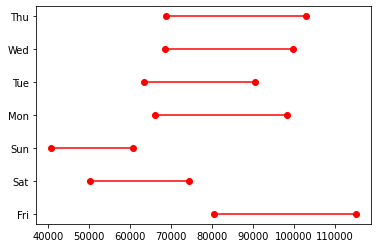

In [160]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['weekdays']))

As presented above, deduced is the confidence intervals of the daily cases of the United States. They have been divided using the variable 'weekdays'.

We will now get the COVID cases by month for United States to draw a graph comparing years 2020 and 2021.

In [161]:
from pandas.api.types import CategoricalDtype
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df['month'].astype(cat_type)

In [162]:
dfus=df[df['country']=='United States']

In [163]:
stats=dfus.groupby("month").agg({"dcases": [np.mean, np.std, np.size]})

In [164]:
stats=pd.DataFrame(stats)

In [165]:
stats.columns=['mean','std','size']

In [166]:
stats.columns

Index(['mean', 'std', 'size'], dtype='object')

In [167]:
import numpy as np
from scipy.stats import norm,t

In [168]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [169]:
x=dfus['dcases']

In [170]:
get_ci_lb(x)

71642.2273804623

In [171]:
def get_ci_ub(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [172]:
get_ci_ub(x)

82752.31909841094

In [173]:
ci_dcases=statsm=dfus.groupby("month").agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsm

dcases                                                  
                mean            std size      get_ci_lb      get_ci_ub
month                                                                 
Jan    150053.024390   96139.362790   41  119707.697286  180398.351494
Feb     42262.649123   46506.630379   57   29922.779102   54602.519143
Mar     32362.080645   28088.831049   62   25228.853207   39495.308083
Apr     46206.983333   19424.943033   60   41188.988453   51224.978214
May     26359.209677    9226.362611   62   24016.152296   28702.267059
Jun     20927.733333   10905.385581   60   18110.573513   23744.893153
Jul     51912.387097   28977.563351   62   44553.463914   59271.310280
Aug     93187.225806   66340.454536   62   76339.904900  110034.546713
Sep     89110.316667   66304.148991   60   71982.138755  106238.494579
Oct     71428.387097   29855.299548   62   63846.560657   79010.213537
Nov    116959.483333   49303.330529   60  104223.082522  129695.884144
Dec    206309.548387  104452.758335   62  179783.514589  232835.582185

In [174]:
statsm.index

CategoricalIndex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', ...], ordered=True, dtype='category', name='month')

In [175]:
statsm.columns=['mean','std','size','lb','ub']

In [176]:
statsm['month']=statsm.index

In [177]:
statsm

,mean,std,size,lb,ub,month
month,,,,,,
Jan,150053.024390,96139.362790,41,119707.697286,180398.351494,Jan
Feb,42262.649123,46506.630379,57,29922.779102,54602.519143,Feb
Mar,32362.080645,28088.831049,62,25228.853207,39495.308083,Mar
Apr,46206.983333,19424.943033,60,41188.988453,51224.978214,Apr
May,26359.209677,9226.362611,62,24016.152296,28702.267059,May
Jun,20927.733333,10905.385581,60,18110.573513,23744.893153,Jun
Jul,51912.387097,28977.563351,62,44553.463914,59271.310280,Jul
Aug,93187.225806,66340.454536,62,76339.904900,110034.546713,Aug
Sep,89110.316667,66304.148991,60,71982.138755,106238.494579,Sep


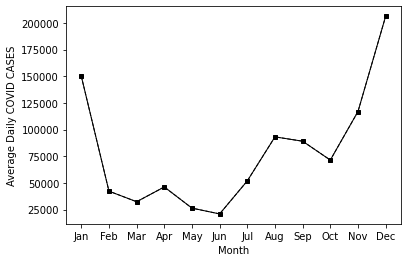

In [178]:
plt.plot( 'month', 'mean', data=statsm, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsm, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.show()

We have created a data frame using the confidence interval of the monthly COVID cases. We then created a graph displaying the data frame of the Average Daily COVID Cases.

We will now compare between 2020 and 2021

To do this, I need to filter the data.

In [179]:
df['date'][0]

'2020-02-24'

In [180]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [181]:
df['date'][0]

Timestamp('2020-02-24 00:00:00')

In [182]:
df['year'] = pd. DatetimeIndex(df['date']). year

In [183]:
df['year'][0]

2020

In [184]:
statsdcases=df.groupby(['country','year','month']).agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

In [185]:
statsdcases

dcases                                  \
                               mean          std  size    get_ci_lb   
country     year month                                                
Afghanistan 2020 Jan            NaN          NaN   NaN          NaN   
                 Feb       0.833333     2.041241   6.0    -1.308818   
                 Mar       5.258065    10.871883  31.0     1.270225   
                 Apr      55.366667    40.385627  30.0    40.286426   
                 May     430.741935   266.692078  31.0   332.918491   
...                             ...          ...   ...          ...   
Zimbabwe    2021 Aug     513.322581   386.841948  31.0   371.427809   
                 Sep     201.566667   135.119789  30.0   151.112108   
                 Oct      69.580645    58.035492  31.0    48.293055   
                 Nov      54.933333    82.622087  30.0    24.081739   
                 Dec    2536.548387  2572.199964  31.0  1593.057823   

                                     
                          get_ci_ub  
country     year month               
Afghanistan 2020 Jan            NaN  
                 Feb       2.975485  
                 Mar       9.245904  
                 Apr      70.446908  
                 May     528.565379  
...                             ...  
Zimbabwe    2021 Aug     655.217353  
                 Sep     252.021225  
                 Oct      90.868235  
                 Nov      85.784928  
                 Dec    3480.038951  

[4488 rows x 5 columns]

In [186]:
statsdcases=statsdcases.reset_index()

In [187]:
statsdcases

country  year month       dcases                                  \
                                      mean          std  size    get_ci_lb   
0     Afghanistan  2020   Jan          NaN          NaN   NaN          NaN   
1     Afghanistan  2020   Feb     0.833333     2.041241   6.0    -1.308818   
2     Afghanistan  2020   Mar     5.258065    10.871883  31.0     1.270225   
3     Afghanistan  2020   Apr    55.366667    40.385627  30.0    40.286426   
4     Afghanistan  2020   May   430.741935   266.692078  31.0   332.918491   
...           ...   ...   ...          ...          ...   ...          ...   
4483     Zimbabwe  2021   Aug   513.322581   386.841948  31.0   371.427809   
4484     Zimbabwe  2021   Sep   201.566667   135.119789  30.0   151.112108   
4485     Zimbabwe  2021   Oct    69.580645    58.035492  31.0    48.293055   
4486     Zimbabwe  2021   Nov    54.933333    82.622087  30.0    24.081739   
4487     Zimbabwe  2021   Dec  2536.548387  2572.199964  31.0  1593.057823   

                   
        get_ci_ub  
0             NaN  
1        2.975485  
2        9.245904  
3       70.446908  
4      528.565379  
...           ...  
4483   655.217353  
4484   252.021225  
4485    90.868235  
4486    85.784928  
4487  3480.038951  

[4488 rows x 8 columns]

We have now created a data frame of the daily number of cases by year and provided their statistics as columns.

We will now filter the United States data on 2021.

In [188]:
statsUS=statsdcases[(statsdcases['country']=='United States') & (statsdcases['year']==2021)]

In [189]:
statsUS

country  year month         dcases                       \
                                          mean            std  size   
4284  United States  2021   Jan  198456.967742   48963.656236  31.0   
4285  United States  2021   Feb   86034.071429   24096.956170  28.0   
4286  United States  2021   Mar   58528.870968   11091.423385  31.0   
4287  United States  2021   Apr   62969.866667   13326.331302  30.0   
4288  United States  2021   May   29748.451613   11654.944186  31.0   
4289  United States  2021   Jun   13276.666667    5477.556971  30.0   
4290  United States  2021   Jul   42530.096774   38371.307282  31.0   
4291  United States  2021   Aug  138009.096774   68559.671456  31.0   
4292  United States  2021   Sep  138317.533333   62395.681666  30.0   
4293  United States  2021   Oct   80985.838710   36717.953309  31.0   
4294  United States  2021   Nov   84910.333333   41307.383674  30.0   
4295  United States  2021   Dec  200893.903226  144836.878947  31.0   

                                    
          get_ci_lb      get_ci_ub  
4284  180496.953637  216416.981847  
4285   76690.247272   95377.895585  
4286   54460.504025   62597.237911  
4287   57993.732778   67946.000555  
4288   25473.383571   34023.519655  
4289   11231.313279   15322.020054  
4290   28455.387633   56604.805916  
4291  112861.206256  163156.987292  
4292  115018.602892  161616.463775  
4293   67517.584702   94454.092718  
4294   69485.902776  100334.763891  
4295  147767.307118  254020.499334

In [190]:
statsUS.columns

MultiIndex([('country',          ''),
            (   'year',          ''),
            (  'month',          ''),
            ( 'dcases',      'mean'),
            ( 'dcases',       'std'),
            ( 'dcases',      'size'),
            ( 'dcases', 'get_ci_lb'),
            ( 'dcases', 'get_ci_ub')],
           )

In [191]:
statsUS.columns=['country','year','month','mean','std','size','lb','ub']

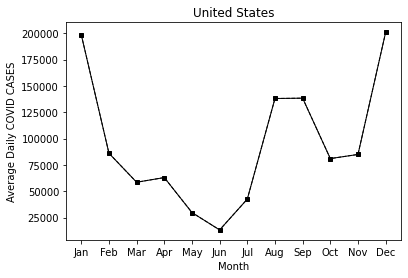

In [192]:
plt.plot( 'month', 'mean', data=statsUS, marker='s', color='black', markersize=4,     linewidth=1, linestyle='--')
plt.plot( 'month', 'mean', data=statsUS, marker='o', color='black',  markersize=4, linewidth=1,linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("United States")
plt.show()

This is a graph for the Average Daily Cases for the country United States for the year 2021.

Now we can compare 2020 to 2021

In [193]:
statsUS21=statsdcases[(statsdcases['country']=='United States') & (statsdcases['year']==2021)]

In [194]:
statsUS21

country  year month         dcases                       \
                                          mean            std  size   
4284  United States  2021   Jan  198456.967742   48963.656236  31.0   
4285  United States  2021   Feb   86034.071429   24096.956170  28.0   
4286  United States  2021   Mar   58528.870968   11091.423385  31.0   
4287  United States  2021   Apr   62969.866667   13326.331302  30.0   
4288  United States  2021   May   29748.451613   11654.944186  31.0   
4289  United States  2021   Jun   13276.666667    5477.556971  30.0   
4290  United States  2021   Jul   42530.096774   38371.307282  31.0   
4291  United States  2021   Aug  138009.096774   68559.671456  31.0   
4292  United States  2021   Sep  138317.533333   62395.681666  30.0   
4293  United States  2021   Oct   80985.838710   36717.953309  31.0   
4294  United States  2021   Nov   84910.333333   41307.383674  30.0   
4295  United States  2021   Dec  200893.903226  144836.878947  31.0   

                                    
          get_ci_lb      get_ci_ub  
4284  180496.953637  216416.981847  
4285   76690.247272   95377.895585  
4286   54460.504025   62597.237911  
4287   57993.732778   67946.000555  
4288   25473.383571   34023.519655  
4289   11231.313279   15322.020054  
4290   28455.387633   56604.805916  
4291  112861.206256  163156.987292  
4292  115018.602892  161616.463775  
4293   67517.584702   94454.092718  
4294   69485.902776  100334.763891  
4295  147767.307118  254020.499334

In [195]:
statsUS20=statsdcases[(statsdcases['country']=='United States') & (statsdcases['year']==2020)]

In [196]:
statsUS20

country  year month         dcases                      \
                                          mean           std  size   
4272  United States  2020   Jan       0.800000      1.032796  10.0   
4273  United States  2020   Feb       0.586207      1.592779  29.0   
4274  United States  2020   Mar    6195.290323   8136.094990  31.0   
4275  United States  2020   Apr   29444.100000   2951.205287  30.0   
4276  United States  2020   May   22969.967742   3675.815070  31.0   
4277  United States  2020   Jun   28578.800000   9530.864738  30.0   
4278  United States  2020   Jul   61294.677419   7287.514718  31.0   
4279  United States  2020   Aug   48365.354839   9820.975222  31.0   
4280  United States  2020   Sep   39903.100000   6415.896956  30.0   
4281  United States  2020   Oct   61870.935484  16595.228308  31.0   
4282  United States  2020   Nov  149008.633333  33377.003387  30.0   
4283  United States  2020   Dec  211725.193548  33854.121304  31.0   

                                    
          get_ci_lb      get_ci_ub  
4272       0.061183       1.538817  
4273      -0.019654       1.192068  
4274    3210.946587    9179.634058  
4275   28342.101835   30546.098165  
4276   21621.667889   24318.267595  
4277   25019.916618   32137.683382  
4278   58621.595440   63967.759399  
4279   44762.992044   51967.717633  
4280   37507.364704   42298.835296  
4281   55783.756596   67958.114371  
4282  136545.455442  161471.811224  
4283  199307.401601  224142.985496

In [197]:
statsUS20.columns=['country','year','month','mean','std','size','lb','ub']

In [198]:
statsUS21.columns=['country','year','month','mean','std','size','lb','ub']

In [199]:
x=statsUS20['month']

In [200]:
x

4272    Jan
4273    Feb
4274    Mar
4275    Apr
4276    May
4277    Jun
4278    Jul
4279    Aug
4280    Sep
4281    Oct
4282    Nov
4283    Dec
Name: month, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [201]:
y1=statsUS20['mean']

In [202]:
y1

4272         0.800000
4273         0.586207
4274      6195.290323
4275     29444.100000
4276     22969.967742
4277     28578.800000
4278     61294.677419
4279     48365.354839
4280     39903.100000
4281     61870.935484
4282    149008.633333
4283    211725.193548
Name: mean, dtype: float64

In [203]:
y2=statsUS21['mean']

In [204]:
y2

4284    198456.967742
4285     86034.071429
4286     58528.870968
4287     62969.866667
4288     29748.451613
4289     13276.666667
4290     42530.096774
4291    138009.096774
4292    138317.533333
4293     80985.838710
4294     84910.333333
4295    200893.903226
Name: mean, dtype: float64

In [205]:
ci_lb_ub20=[statsUS20['lb'],statsUS20['ub']]

In [206]:
err20 = np.abs(ci_lb_ub20 - statsUS20['mean'].to_numpy())

In [207]:
ci_lb_ub21=[statsUS21['lb'],statsUS21['ub']]

In [208]:
err21 = np.abs(ci_lb_ub21 - statsUS21['mean'].to_numpy())

In [209]:
from matplotlib.transforms import Affine2D

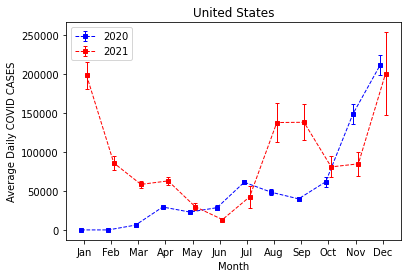

In [210]:
fig, ax = plt.subplots()

trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
plt.errorbar('month', 'mean',  yerr=err20, data=statsUS20,marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1, linestyle='--',transform=trans1)
plt.errorbar('month', 'mean',  yerr=err21, data=statsUS21,marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--',transform=trans2)
plt.legend(['2020','2021'])
plt.xlabel("Month")
plt.ylabel("Average Daily COVID CASES")
plt.title("United States")
plt.show()

This is a graph that compares the Average Daily COVID Cases of the United States during 2020 and 2021. As presented, in the year 2020, cases increased gradually throughout the year. However, in 2021, there were multiple fluctuations in the daily cases. It would increase and decrease on different intervals at multiple times.

Now we will compare COVID cases with respect to income.

In [242]:
from pandas.api.types import CategoricalDtype
cats=cats=['Low income','Lower middle income', 'Upper middle income','High income']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['income'] = df['income'].astype(cat_type)

In [243]:
import numpy as np

In [245]:
stats=df.groupby("income").agg({"dcases": [np.mean, np.std, np.size]})

In [246]:
stats

dcases                     
                            mean           std   size
income                                               
Low income            128.303866    528.052513  18936
Lower middle income  1967.968678  14104.539546  29532
Upper middle income  2599.124533   8484.977570  35573
High income          3508.379053  15941.148992  38802

In [247]:
import scipy.stats 

In [248]:
ci95_hi = []
ci95_lo = []

In [249]:
for i in stats.index:
    m, s, n = stats.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])

In [250]:
ci95_hi

[135.82564020188033, 2128.8426288376204, 2687.3023663783597, 3666.999730039011]

In [251]:
ci95_lo

[120.78209110356958,
 1807.0947272506905,
 2510.9466989239763,
 3349.7583752132955]

In [252]:
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

                          dcases                           ci95_hi  \
                            mean           std   size                
income                                                               
Low income            128.303866    528.052513  18936   135.825640   
Lower middle income  1967.968678  14104.539546  29532  2128.842629   
Upper middle income  2599.124533   8484.977570  35573  2687.302366   
High income          3508.379053  15941.148992  38802  3666.999730   

                         ci95_lo  
                                  
income                            
Low income            120.782091  
Lower middle income  1807.094727  
Upper middle income  2510.946699  
High income          3349.758375  


In [253]:
df_ci= pd.DataFrame(stats)

In [254]:
df_ci

dcases                           ci95_hi  \
                            mean           std   size                
income                                                               
Low income            128.303866    528.052513  18936   135.825640   
Lower middle income  1967.968678  14104.539546  29532  2128.842629   
Upper middle income  2599.124533   8484.977570  35573  2687.302366   
High income          3508.379053  15941.148992  38802  3666.999730   

                         ci95_lo  
                                  
income                            
Low income            120.782091  
Lower middle income  1807.094727  
Upper middle income  2510.946699  
High income          3349.758375

This is a data frame that compares the confidence interval of 95% with regards to income and daily COVID Cases

In [255]:
df_ci.index

CategoricalIndex(['Low income', 'Lower middle income', 'Upper middle income',
                  'High income'],
                 categories=['Low income', 'Lower middle income', 'Upper middle income', 'High income'], ordered=True, dtype='category', name='income')

In [256]:
df_ci['region']=df_ci.index

In [257]:
df_ci

dcases                           ci95_hi  \
                            mean           std   size                
income                                                               
Low income            128.303866    528.052513  18936   135.825640   
Lower middle income  1967.968678  14104.539546  29532  2128.842629   
Upper middle income  2599.124533   8484.977570  35573  2687.302366   
High income          3508.379053  15941.148992  38802  3666.999730   

                         ci95_lo               region  
                                                       
income                                                 
Low income            120.782091           Low income  
Lower middle income  1807.094727  Lower middle income  
Upper middle income  2510.946699  Upper middle income  
High income          3349.758375          High income

In [258]:
df_ci.columns

MultiIndex([( 'dcases', 'mean'),
            ( 'dcases',  'std'),
            ( 'dcases', 'size'),
            ('ci95_hi',     ''),
            ('ci95_lo',     ''),
            ( 'region',     '')],
           )

In [259]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x24479c2c880>,
 [Text(0, 0, 'Low income'),
  Text(0, 1, 'Lower middle income'),
  Text(0, 2, 'Upper middle income'),
  Text(0, 3, 'High income')])

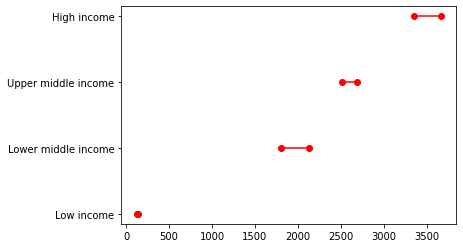

In [260]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['region']))

This is a graph that displays the confidence intervals of the different levels of income. It is shown that the areas with a higher level of income contract more cases. This is not necessarily due to income alone, as the United States, a country with high income, has a high number of deaths. This could be due to population size and growth.